In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv("flights_sample_3m.csv")

In [4]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [5]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [6]:
df = df[df['FL_DATE'] >= '2022-09-01']

In [7]:
df = df.drop(['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'CANCELLATION_CODE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'ORIGIN', 'DEST'], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692162 entries, 1 to 2999997
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   FL_DATE           692162 non-null  datetime64[ns]
 1   AIRLINE           692162 non-null  object        
 2   DOT_CODE          692162 non-null  int64         
 3   FL_NUMBER         692162 non-null  int64         
 4   ORIGIN_CITY       692162 non-null  object        
 5   DEST_CITY         692162 non-null  object        
 6   CRS_DEP_TIME      692162 non-null  int64         
 7   DEP_TIME          679674 non-null  float64       
 8   DEP_DELAY         679667 non-null  float64       
 9   TAXI_OUT          679378 non-null  float64       
 10  WHEELS_OFF        679378 non-null  float64       
 11  WHEELS_ON         679116 non-null  float64       
 12  TAXI_IN           679116 non-null  float64       
 13  CRS_ARR_TIME      692162 non-null  int64         
 14  ARR_TIME

In [9]:
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 677567 entries, 1 to 2999997
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   FL_DATE           677567 non-null  datetime64[ns]
 1   AIRLINE           677567 non-null  object        
 2   DOT_CODE          677567 non-null  int64         
 3   FL_NUMBER         677567 non-null  int64         
 4   ORIGIN_CITY       677567 non-null  object        
 5   DEST_CITY         677567 non-null  object        
 6   CRS_DEP_TIME      677567 non-null  int64         
 7   DEP_TIME          677567 non-null  float64       
 8   DEP_DELAY         677567 non-null  float64       
 9   TAXI_OUT          677567 non-null  float64       
 10  WHEELS_OFF        677567 non-null  float64       
 11  WHEELS_ON         677567 non-null  float64       
 12  TAXI_IN           677567 non-null  float64       
 13  CRS_ARR_TIME      677567 non-null  int64         
 14  ARR_TIME

In [11]:
airports = pd.read_csv("airports.csv")

In [12]:
df['YEAR'] = df['FL_DATE'].dt.year
df['MONTH'] = df['FL_DATE'].dt.month
df['DAY'] = df['FL_DATE'].dt.day

In [13]:
df = df.drop(['FL_DATE'], axis=1)

In [50]:
del df

In [14]:
new_df = df.to_csv('new_flights.csv') 

In [15]:
new_df = pd.read_csv("new_flights.csv")

In [16]:
new_df

,Unnamed: 0,AIRLINE,DOT_CODE,FL_NUMBER,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,...,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,YEAR,MONTH,DAY
0,1,Delta Air Lines Inc.,19790,1149,"Minneapolis, MN","Seattle, WA",2120,2114.0,-6.0,9.0,...,-5.0,0.0,0.0,235.0,236.0,189.0,1399.0,2022,11,19
1,3,Delta Air Lines Inc.,19790,2295,"Minneapolis, MN","San Francisco, CA",1609,1608.0,-1.0,27.0,...,24.0,0.0,0.0,260.0,285.0,249.0,1589.0,2023,3,6
2,6,American Airlines Inc.,19805,2134,"Washington, DC","Boston, MA",1010,1001.0,-9.0,23.0,...,-29.0,0.0,0.0,109.0,89.0,58.0,399.0,2023,6,11
3,8,Spirit Air Lines,20416,590,"Houston, TX","Los Angeles, CA",530,527.0,-3.0,11.0,...,-11.0,0.0,0.0,227.0,219.0,200.0,1379.0,2023,2,12
4,22,Delta Air Lines Inc.,19790,2706,"Grand Rapids, MI","Minneapolis, MN",730,720.0,-10.0,10.0,...,-30.0,0.0,0.0,96.0,76.0,61.0,408.0,2022,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677562,2999989,Republic Airline,20452,4644,"Portland, ME","Washington, DC",550,550.0,0.0,8.0,...,-14.0,0.0,0.0,117.0,103.0,80.0,482.0,2023,5,29
677563,2999990,SkyWest Airlines Inc.,20304,4126,"Detroit, MI","Madison, WI",825,824.0,-1.0,32.0,...,13.0,0.0,0.0,78.0,92.0,55.0,311.0,2023,7,26
677564,2999995,American Airlines Inc.,19805,1522,"Jacksonville, FL","Charlotte, NC",1742,1740.0,-2.0,10.0,...,-16.0,0.0,0.0,85.0,71.0,55.0,328.0,2022,11,13
677565,2999996,American Airlines Inc.,19805,1535,"Chicago, IL","Austin, TX",1300,1254.0,-6.0,10.0,...,-37.0,0.0,0.0,176.0,145.0,130.0,977.0,2022,11,2


In [17]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

global_stats = df['DEP_DELAY'].groupby(df['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
AIRLINE,,,,
Horizon Air,-24.0,356.0,2440.0,8.491393
Mesa Airlines Inc.,-24.0,981.0,3438.0,11.087551
Hawaiian Airlines Inc.,-24.0,1615.0,8042.0,13.791345
Allegiant Air,-33.0,1778.0,11471.0,18.143318
Frontier Airlines Inc.,-28.0,1375.0,16673.0,25.087927
PSA Airlines Inc.,-37.0,1338.0,19147.0,6.889173
Endeavor Air Inc.,-90.0,1135.0,20130.0,8.582712
Envoy Air,-30.0,1294.0,22485.0,7.533244
Alaska Airlines Inc.,-48.0,680.0,24328.0,7.392757


In [18]:
from matplotlib.gridspec import GridSpec
import seaborn as sns

C:\Users\Pilar\AppData\Local\Temp\ipykernel_13004\3490486221.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])


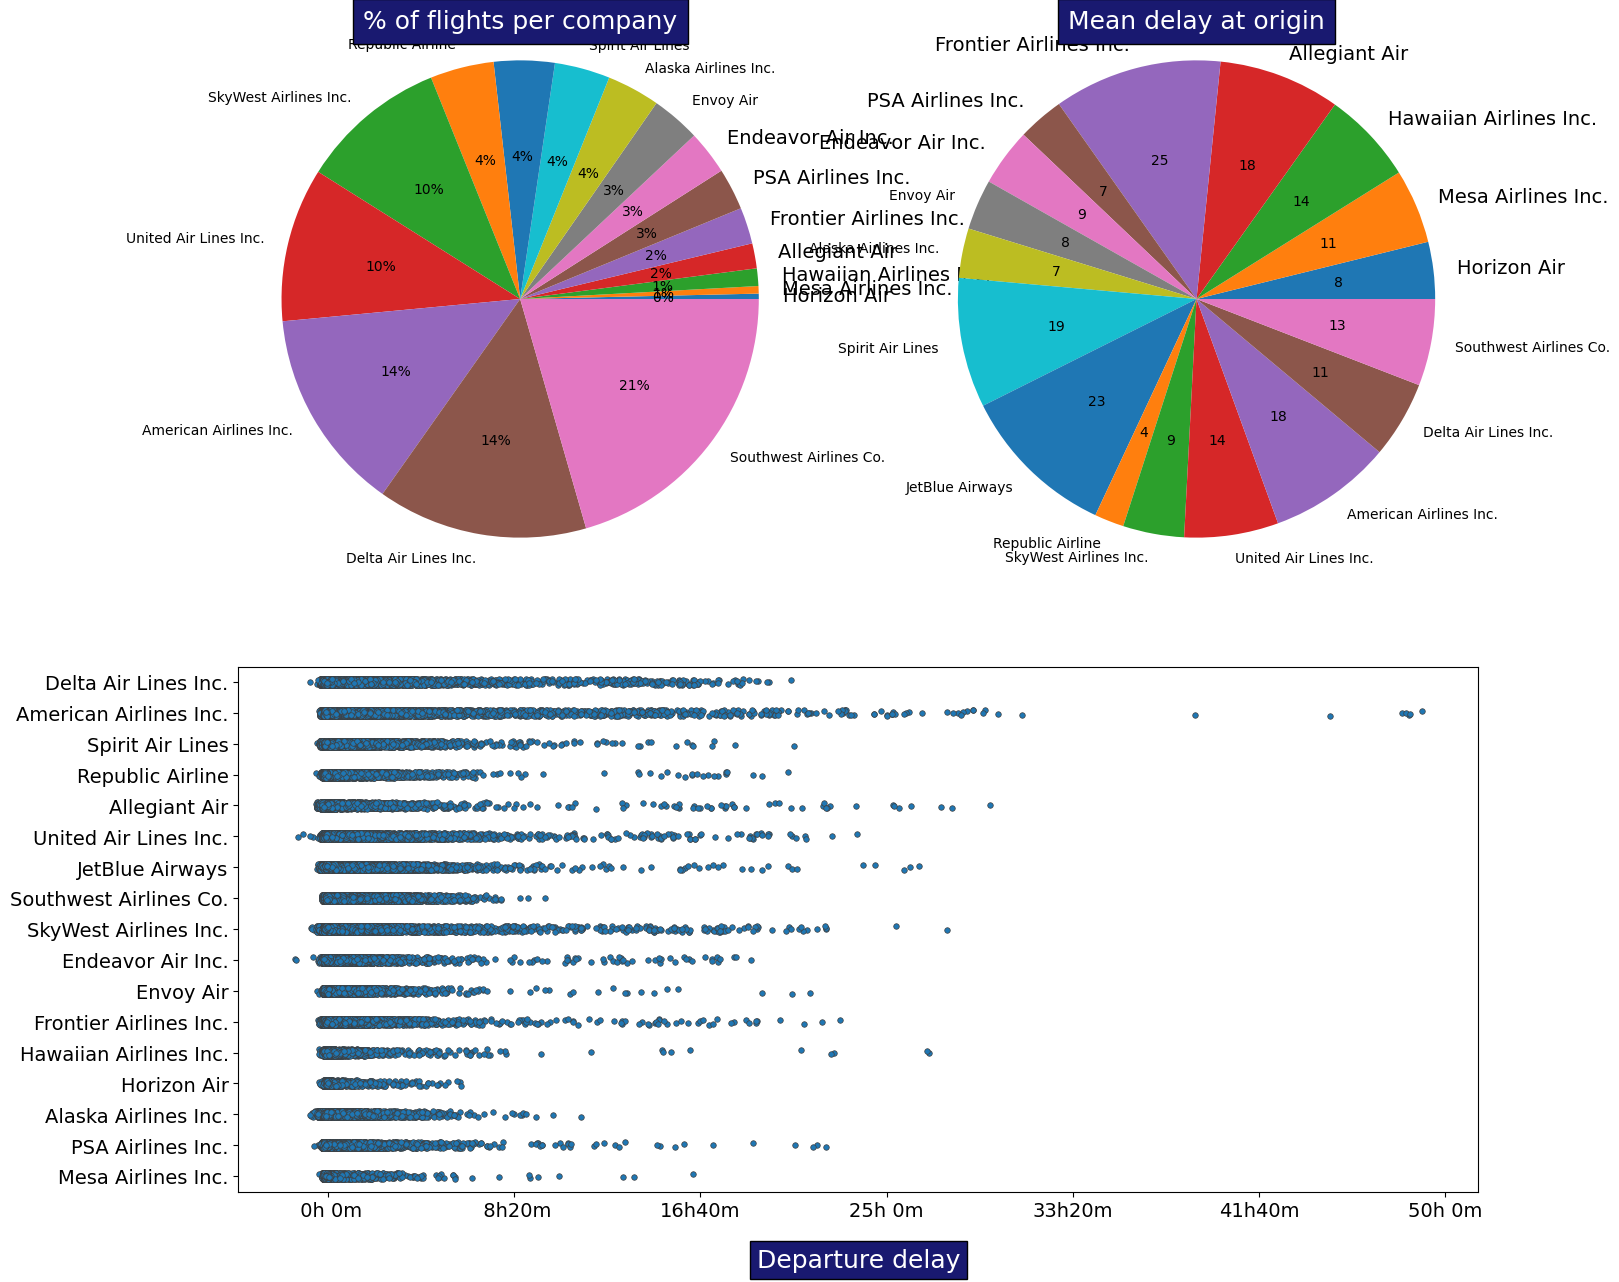

In [19]:
fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 

labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len('AIRLINE'))]
patches, texts, autotexts = ax1.pie(sizes,
                                labels=labels,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len('AIRLINE')): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)


sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len('AIRLINE'))]
patches, texts, autotexts = ax2.pie(sizes, labels = labels,
                                 shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))


for i in range(len('AIRLINE')): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)

ax3 = sns.stripplot(y="AIRLINE", x="DEP_DELAY", size = 4,
                    data=new_df, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)

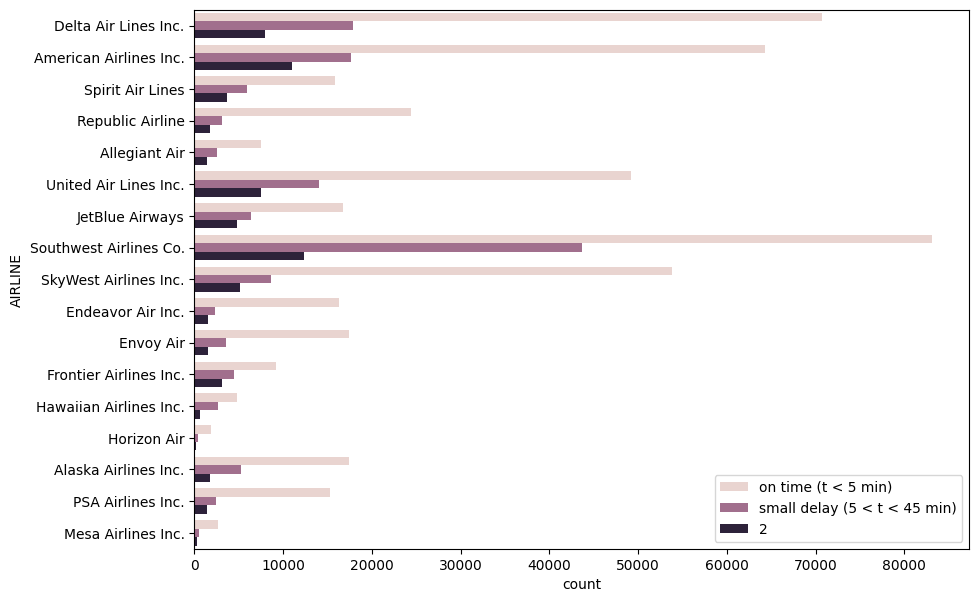

In [20]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
new_df['DELAY'] = new_df['DEP_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY', data=new_df)
L = plt.legend()
L.get_texts()[0].set_text('early departure (t < 0 min)')
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
plt.show()

MACHING LEARNING

In [21]:
new_df['ORIGIN_CITY'] = new_df['ORIGIN_CITY'].astype('category').cat.codes
new_df['DEST_CITY'] = new_df['DEST_CITY'].astype('category').cat.codes

In [22]:
features = new_df[['MONTH', 'DAY', 'ORIGIN_CITY', 'DEST_CITY', 'AIR_TIME', 'DISTANCE',
        'DEP_DELAY', 'TAXI_OUT']]
target = new_df['CANCELLED']

In [23]:
new_df

,Unnamed: 0,AIRLINE,DOT_CODE,FL_NUMBER,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,...,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,YEAR,MONTH,DAY,DELAY
0,1,Delta Air Lines Inc.,19790,1149,214,307,2120,2114.0,-6.0,9.0,...,0.0,0.0,235.0,236.0,189.0,1399.0,2022,11,19,0
1,3,Delta Air Lines Inc.,19790,2295,214,292,1609,1608.0,-1.0,27.0,...,0.0,0.0,260.0,285.0,249.0,1589.0,2023,3,6,0
2,6,American Airlines Inc.,19805,2134,343,40,1010,1001.0,-9.0,23.0,...,0.0,0.0,109.0,89.0,58.0,399.0,2023,6,11,0
3,8,Spirit Air Lines,20416,590,149,197,530,527.0,-3.0,11.0,...,0.0,0.0,227.0,219.0,200.0,1379.0,2023,2,12,0
4,22,Delta Air Lines Inc.,19790,2706,126,214,730,720.0,-10.0,10.0,...,0.0,0.0,96.0,76.0,61.0,408.0,2022,11,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677562,2999989,Republic Airline,20452,4644,262,343,550,550.0,0.0,8.0,...,0.0,0.0,117.0,103.0,80.0,482.0,2023,5,29,0
677563,2999990,SkyWest Airlines Inc.,20304,4126,87,201,825,824.0,-1.0,32.0,...,0.0,0.0,78.0,92.0,55.0,311.0,2023,7,26,0
677564,2999995,American Airlines Inc.,19805,1522,160,58,1742,1740.0,-2.0,10.0,...,0.0,0.0,85.0,71.0,55.0,328.0,2022,11,13,0
677565,2999996,American Airlines Inc.,19805,1535,62,21,1300,1254.0,-6.0,10.0,...,0.0,0.0,176.0,145.0,130.0,977.0,2022,11,2,0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=42)

In [25]:
normalizer = MinMaxScaler()

normalizer.fit(X_train) 

MinMaxScaler()

In [26]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [65]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [28]:
bagging_reg = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                               n_estimators=100,
                               random_state=42)

In [29]:
bagging_reg.fit(X_train_norm, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                  n_estimators=100, random_state=42)

In [30]:
pred = bagging_reg.predict(X_test_norm)
bag_acc = bagging_reg.score(X_test_norm, y_test)

print(f"MAE: { mean_absolute_error(pred, y_test): .2f}")
print(f"RMSE: { mean_squared_error(pred, y_test): .2f}")
print(f"R2 score: { bagging_reg.score(X_test_norm, y_test): .2f}")

MAE:  0.00
RMSE:  0.00
R2 score:  1.00


In [31]:
features = new_df[['MONTH', 'DAY', 'ORIGIN_CITY', 'DEST_CITY', 'AIR_TIME', 'DISTANCE',
        'DEP_DELAY', 'TAXI_OUT']]
target = new_df['ARR_DELAY']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=42)

In [33]:
normalizer = MinMaxScaler()

normalizer.fit(X_train) 

MinMaxScaler()

In [34]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [60]:
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20),
                               n_estimators=100,
                               random_state=42)

In [61]:
bagging_reg.fit(X_train_norm, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 n_estimators=100, random_state=42)

In [62]:
import gc
gc.collect()

22

In [63]:
pred = bagging_reg.predict(X_test_norm)
bag_acc = bagging_reg.score(X_test_norm, y_test)

print(f"MAE: { mean_absolute_error(pred, y_test): .2f}")
print(f"RMSE: { mean_squared_error(pred, y_test): .2f}")
print(f"R2 score: { bagging_reg.score(X_test_norm, y_test): .2f}")

MAE:  7.21
RMSE:  102.97
R2 score:  0.97


In [66]:
forest = RandomForestRegressor(n_estimators=100,
                             random_state=42)

In [68]:
forest.fit(X_train_norm, y_train)

RandomForestRegressor(random_state=42)

In [69]:
pred = forest.predict(X_test_norm)
forest_acc = forest.score(X_test_norm, y_test)

print(f"MAE: { mean_absolute_error(pred, y_test): .2f}")
print(f"RMSE: { mean_squared_error(pred, y_test): .2f}")
print(f"R2 score: { forest.score(X_test_norm, y_test): .2f}")

MAE:  6.94
RMSE:  97.44
R2 score:  0.97


In [70]:
gb_reg = GradientBoostingRegressor(n_estimators=100,
                                   random_state=42)

In [71]:
gb_reg.fit(X_train_norm, y_train)

GradientBoostingRegressor(random_state=42)

In [72]:
pred = gb_reg.predict(X_test_norm)
gb_acc = gb_reg.score(X_test_norm, y_test)

print(f"MAE: { mean_absolute_error(pred, y_test): .2f}")
print(f"RMSE: { mean_squared_error(pred, y_test): .2f}")
print(f"R2 score: { gb_reg.score(X_test_norm, y_test): .2f}")

MAE:  7.62
RMSE:  114.45
R2 score:  0.97


In [73]:
ada_reg = AdaBoostRegressor(n_estimators=100,
                            random_state=42)

In [74]:
ada_reg.fit(X_train_norm, y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [75]:
pred = ada_reg.predict(X_test_norm)
ada_acc = ada_reg.score(X_test_norm, y_test)

print(f"MAE: { mean_absolute_error(pred, y_test): .2f}")
print(f"RMSE: { mean_squared_error(pred, y_test): .2f}")
print(f"R2 score: { ada_reg.score(X_test_norm, y_test): .2f}")

MAE:  66.33
RMSE:  4784.92
R2 score: -0.35


In [76]:
print(f"Bagging Accuracy: {bag_acc}")
print(f"Random Forest Accuracy: {forest_acc}")
print(f"Gradient Boosting Accuracy: {gb_acc}")
print(f"AdaBoost Accuracy: {ada_acc}")

Bagging Accuracy: 0.9710040023054798
Random Forest Accuracy: 0.972561693125157
Gradient Boosting Accuracy: 0.9677713348114274
AdaBoost Accuracy: -0.34739976263708106


In [77]:
mejor_modelo = max((bag_acc, "Bagging"), (forest_acc, "Random Forest"), (gb_acc, "Gradient Boosting"), (ada_acc, "AdaBoost"))
print(f"El mejor modelo es: {mejor_modelo[1]} con una precisión de {mejor_modelo[0]}")

El mejor modelo es: Random Forest con una precisión de 0.972561693125157
